In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=ba02477791f27ae74700bbec706e90ca450fa66f6ff9e237d39fc1aabcdc355a
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
import pandas as pd
import numpy as np
from apyori import apriori

In [ ]:
df = pd.read_csv('/content/Market_Basket_Optimisation.csv',header=None)

In [ ]:
df.head()

(7501, 20)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Data Cleaning step
df.fillna(0,inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
transactions = []

for i in range(0,len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0,20) if str(df.values[i,j])!='0'])

transactions[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [ ]:
rules = apriori(transactions, min_support=0.003, min_confidance=0.2, min_lift=3, min_length=2)

# min_support = 0.003 -> means selecting items with min support of 0.3%
# min_confidance = 0.2 -> means min confidance of 20%
# min_lift = 3
# min_length = 2 -> means no. of items in the transaction should be 2
#it generates a set of rules in a generator file...

# all rules need to be converted in a list..
Results = list(rules)

In [ ]:
df_results = pd.DataFrame(Results)

df_results.head()
df_results.ordered_statistics[0][0]

OrderedStatistic(items_base=frozenset({'brownies'}), items_add=frozenset({'cottage cheese'}), confidence=0.10276679841897232, lift=3.225329518580382)

In [ ]:
support = df_results.support

In [ ]:
#all four empty list which will contain lhs, rhs, confidance and lift respectively.
first_values = []
second_values = []
third_values = []
fourth_value = []

for i in range(df_results.shape[0]):
    single_list = df_results['ordered_statistics'][i][0]
    first_values.append(list(single_list[0]))
    second_values.append(list(single_list[1]))
    third_values.append(single_list[2])
    fourth_value.append(single_list[3])

In [ ]:
# convert all four list into dataframe for further operation..
lhs = pd.DataFrame(first_values)
rhs = pd.DataFrame(second_values)

confidance=pd.DataFrame(third_values,columns=['Confidance'])
lift=pd.DataFrame(fourth_value,columns=['lift'])

# concat all list together in a single dataframe
df_final = pd.concat([lhs,rhs,support,confidance,lift], axis=1)
df_final.fillna(value=' ', inplace=True)
df_final.columns = ['lhs',1,'rhs',2,3,'support','confidance','lift']

df_final['lhs'] = df_final['lhs'] + str(", ") + df_final[1]
df_final['rhs'] = df_final['rhs'] + str(", ") + df_final[2] + str(", ") + df_final[3]

df_final.drop(columns=[1,2,3],inplace=True)
df_final.head()

## Showing top 10 items, based on lift.  Sorting in desc order
df_final.sort_values('lift', ascending=False).head(10)


,lhs,rhs,support,confidance,lift
58,"olive oil,","whole wheat pasta, mineral water,",0.003866,0.058704,6.115863
6,"fromage blanc,","honey, ,",0.003333,0.245098,5.164271
49,"ground beef,","spaghetti, tomato sauce,",0.003066,0.031208,4.980600
1,"chicken,","light cream, ,",0.004533,0.075556,4.843951
3,"escalope,","pasta, ,",0.005866,0.073950,4.700812
28,"ground beef,","herb & pepper, french fries,",0.003200,0.032564,4.697422
11,"pasta,","shrimp, ,",0.005066,0.322034,4.506672
23,"ground beef,","herb & pepper, chocolate,",0.003999,0.040706,4.490183
69,"frozen vegetables,","shrimp, chocolate, mineral water",0.003200,0.033566,4.417225
10,"olive oil,","whole wheat pasta, ,",0.007999,0.121457,4.122410


In [ ]:
#
#
# NEW LIBRARY--------------------------------------------------------------------------
#
#

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

df1 = pd.read_csv('/content/data-2.csv', encoding="ISO-8859-1")
df1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df1.Country.value_counts().head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


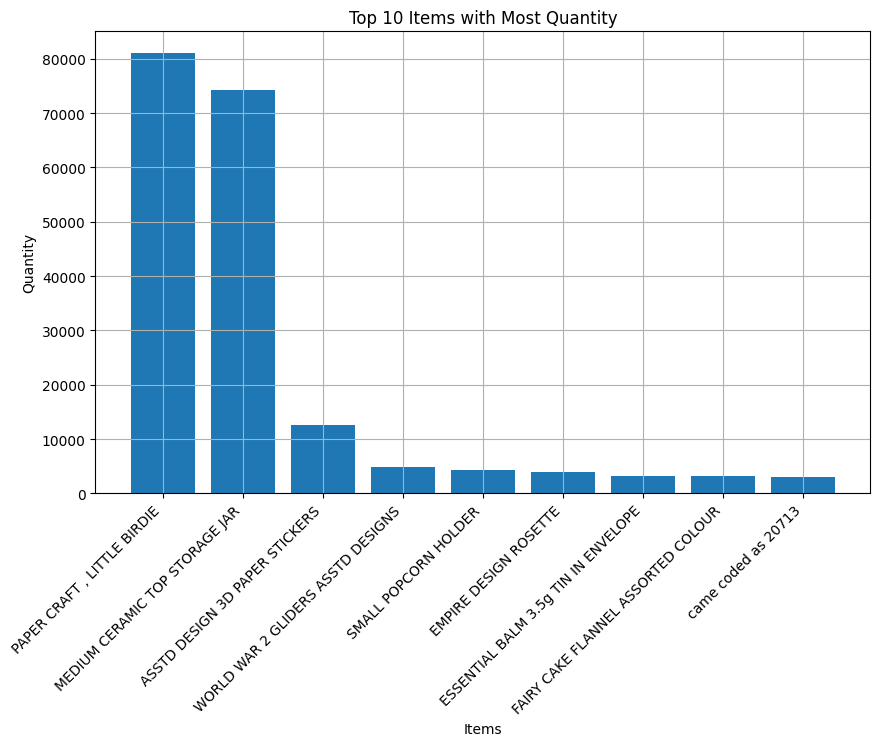

In [ ]:
df1['Description'] = df1['Description'].str.strip()
#some of transaction quantity is negative which can not be possible remove them.
df1 = df1[df1.Quantity >0]
col = df1["Description"]
mask = df1[col.str.contains("AMAZON FEE") | col.str.contains("POSTAGE") | col.str.contains("Adjust bad debt")]
df1.drop(mask.index, inplace=True)

# df2 = df1.sample(frac=0.1)
df2 = df1.dropna(subset=["Description"])
df2 = df2[df2["Description"] != "?"]
# plt.figure(figsize=(10, 6))
# plt.bar(df2["Description"].sample(50).astype(str), df2["Quantity"].sample(50))

top_des = df2.sort_values(by="Quantity", ascending=False).head(10)

des = top_des["Description"]
qts = top_des["Quantity"]

plt.figure(figsize=(10, 6))
plt.bar(des.astype(str), qts)
plt.xlabel("Items")
plt.ylabel("Quantity")
plt.title("Top 10 Items with Most Quantity")

plt.xticks(rotation=45, ha="right")

plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


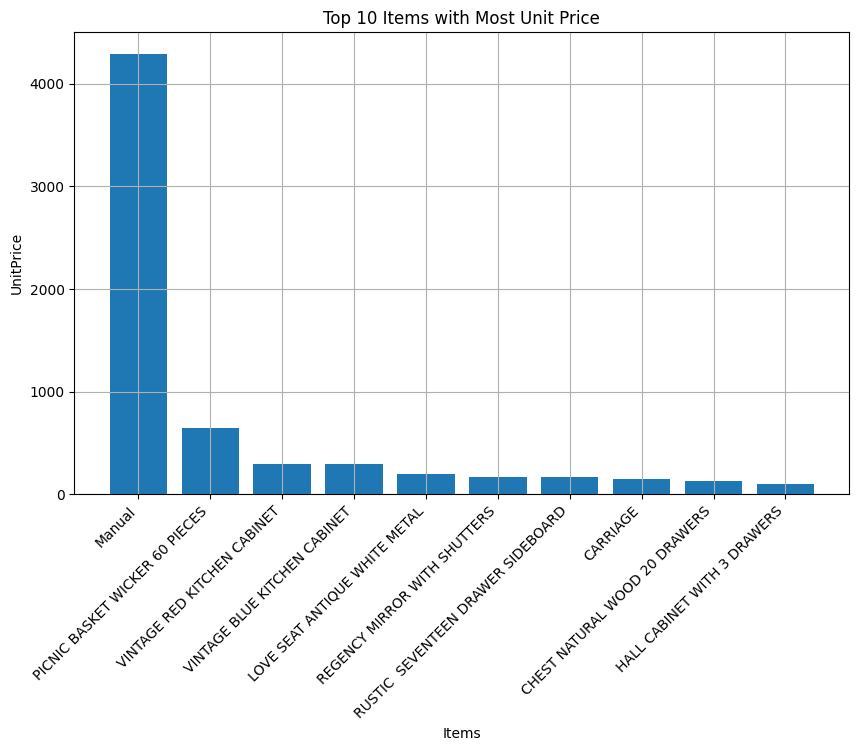

In [ ]:
top_des_price = df2.sort_values(by="UnitPrice", ascending=False)
top_des_price = top_des_price.drop_duplicates(subset=["Description"]).head(10)

# uq_des_price = top_des_price["Description"].unique()
# print(uq_des_price)

des2 = top_des_price["Description"]
price = top_des_price["UnitPrice"]

plt.figure(figsize=(10, 6))
plt.bar(des2.astype(str), price)
plt.xlabel("Items")
plt.ylabel("UnitPrice")
plt.title("Top 10 Items with Most Unit Price")

plt.xticks(rotation=45, ha="right")

plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


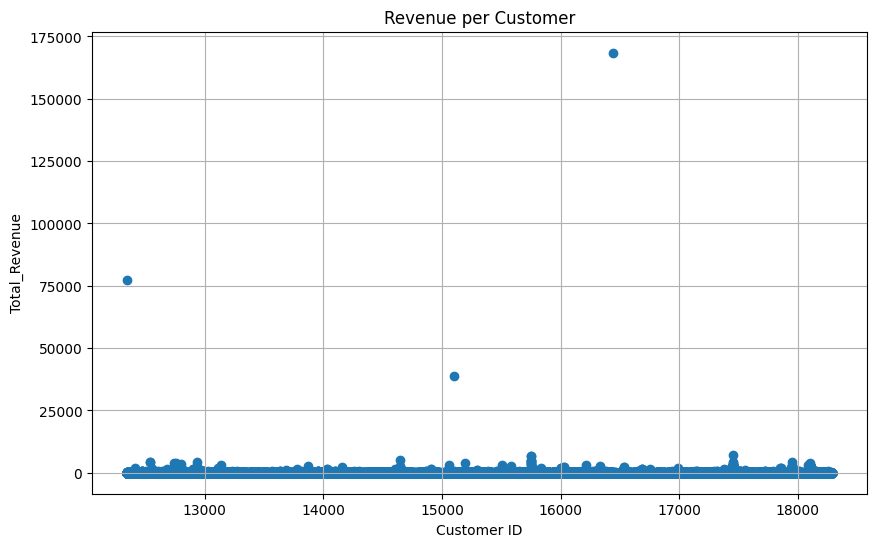

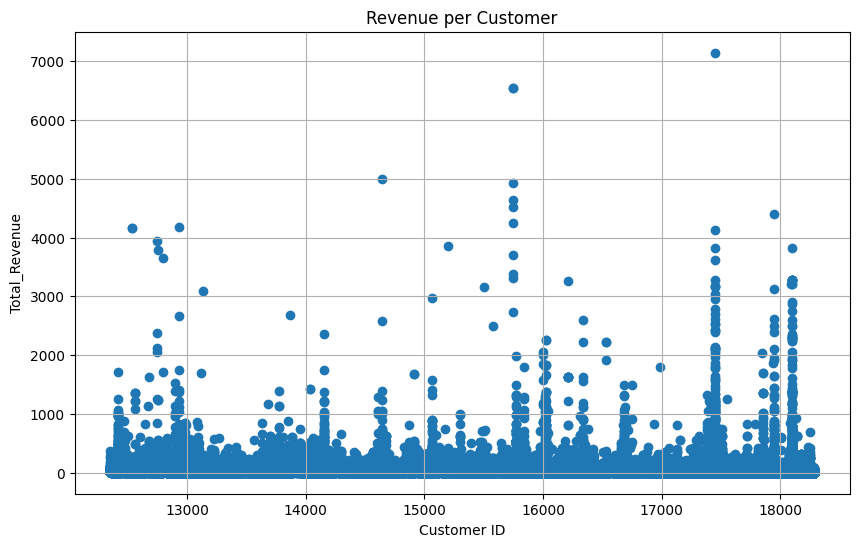

In [ ]:
df2["Total_Revenue"] = df2["UnitPrice"] * df2["Quantity"]

plt.figure(figsize=(10, 6))
plt.scatter(df2["CustomerID"], df2["Total_Revenue"])

plt.xlabel("Customer ID")
plt.ylabel("Total_Revenue")
plt.title("Revenue per Customer")

plt.grid(True)
plt.show()

df3 = df2[df2.Total_Revenue < 10000]

plt.figure(figsize=(10, 6))
plt.scatter(df3["CustomerID"], df3["Total_Revenue"])
plt.xlabel("Customer ID")
plt.ylabel("Total_Revenue")
plt.title("Revenue per Customer")

plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(528848, 9)


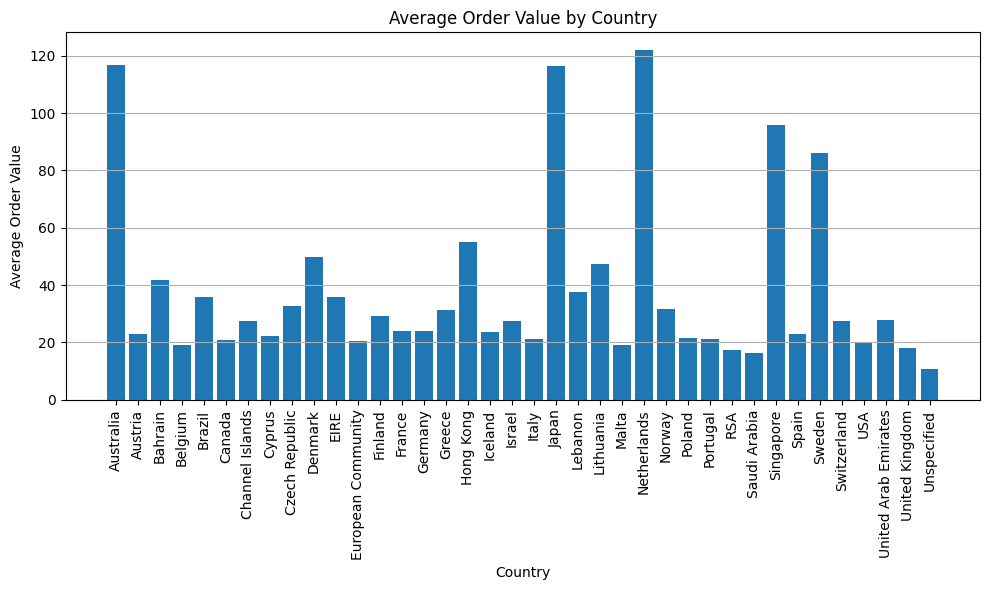

In [ ]:
# df2["Total_Revenue"] = df2["UnitPrice"] * df2["Quantity"]
avg_order_value = df2.groupby("Country")["Total_Revenue"].mean().reset_index()
print(df2.shape)

plt.figure(figsize=(10, 6))
plt.bar(avg_order_value["Country"], avg_order_value["Total_Revenue"])
plt.xlabel("Country")
plt.ylabel("Average Order Value")
plt.title("Average Order Value by Country")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [ ]:
df1.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(529446, 8)

In [ ]:
# converting data in format which is required
# converting using pivot table and Quantity sum as values. fill 0 if any nan values

basket = pd.pivot_table(data=df1,index='InvoiceNo',columns='Description',values='Quantity', aggfunc='sum',fill_value=0)
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
basket['10 COLOUR SPACEBOY PEN'].head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo
536365     0
536366     0
536367     0
536368     0
536369     0
536370     0
536371     0
536372     0
536373     0
536374     0
536375     0
536376     0
536377     0
536378     0
536380     0
536381     0
536382     0
536384     0
536385     0
536386     0
536387     0
536388     0
536389     0
536390     0
536392     0
536393     0
536394     0
536395     0
536396     0
536397     0
536398     0
536399     0
536400     0
536401     0
536402     0
536403     0
536404     0
536405     0
536406     0
536407     0
536408    24
536409     0
536412     0
536415     0
536416     0
536420     0
536423     0
536425     0
536437     0
536446     0
Name: 10 COLOUR SPACEBOY PEN, dtype: int64

In [ ]:
# we dont need quantity sum
# we need either has taken or not
# so if user has taken that item mark as 1 else mark as 0.

def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0
basket_sets = basket.applymap(convert_into_binary)
basket_sets['10 COLOUR SPACEBOY PEN'].head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo
536365    0
536366    0
536367    0
536368    0
536369    0
536370    0
536371    0
536372    0
536373    0
536374    0
536375    0
536376    0
536377    0
536378    0
536380    0
536381    0
536382    0
536384    0
536385    0
536386    0
536387    0
536388    0
536389    0
536390    0
536392    0
536393    0
536394    0
536395    0
536396    0
536397    0
536398    0
536399    0
536400    0
536401    0
536402    0
536403    0
536404    0
536405    0
536406    0
536407    0
536408    1
536409    0
536412    0
536415    0
536416    0
536420    0
536423    0
536425    0
536437    0
536446    0
Name: 10 COLOUR SPACEBOY PEN, dtype: int64

In [ ]:

# call apriori function and pass minimum support here we are passing 3%.
# means 3 times in total number of transaction the item should be present.
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)

frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.047619,(6 RIBBONS RUSTIC CHARM)
1,0.030815,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.041286,(60 TEATIME FAIRY CAKE CASES)
3,0.030666,(72 SWEETHEART FAIRY CAKE CASES)
4,0.048866,(ALARM CLOCK BAKELIKE GREEN)
...,...,...
131,0.041137,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA..."
132,0.033907,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ..."
133,0.036101,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)"
134,0.031962,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS..."


In [ ]:
rules_mlxtend = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.052406,0.048866,0.031912,0.608944,12.461601,0.029351,2.432220,0.970620
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.048866,0.052406,0.031912,0.653061,12.461601,0.029351,2.731301,0.967007
2,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050611,0.038195,0.031563,0.623645,16.327946,0.029630,2.555581,0.988799
3,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038195,0.050611,0.031563,0.826371,16.327946,0.029630,5.467911,0.976035
4,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.050611,0.053154,0.038295,0.756650,14.235104,0.035605,3.890886,0.979315
5,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.053154,0.050611,0.038295,0.720450,14.235104,0.035605,3.396137,0.981945
6,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.104313,0.060733,0.041137,0.394359,6.493333,0.034802,1.550866,0.944522
7,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.060733,0.104313,0.041137,0.677340,6.493333,0.034802,2.775946,0.900698
8,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.058589,0.104313,0.033907,0.578723,5.547944,0.027795,2.126125,0.870771
9,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.104313,0.058589,0.033907,0.325048,5.547944,0.027795,1.394782,0.915223


In [ ]:
# rules_mlxtend.rename(columns={'antecedents':'lhs','consequents':'rhs'})

# as based business use case we can sort based on confidance and lift.
rules_mlxtend[ (rules_mlxtend['lift'] >= 4) & (rules_mlxtend['confidence'] >= 0.7) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038195,0.050611,0.031563,0.826371,16.327946,0.029630,5.467911,0.976035
4,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.050611,0.053154,0.038295,0.756650,14.235104,0.035605,3.890886,0.979315
5,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.053154,0.050611,0.038295,0.720450,14.235104,0.035605,3.396137,0.981945
